In [3]:
import numpy as np
import matplotlib.pyplot as plt
from neurodiffeq import diff      # the differentiation operation
from neurodiffeq.ode import Solver1D # the ANN-based solver
from neurodiffeq.conditions import IVP   # the initial condition

In [4]:
def eq(u, t):
    return [diff(u, t) + u]
init_val_ex = IVP(t_0=0.0, u_0=1.0)       # specify the initial conditon

# solve the ODE
solver = Solver1D(
    ode_system=eq, conditions=[init_val_ex], t_min=0.0, t_max=2.0
)
solver.fit(max_epochs=1000)

Training Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

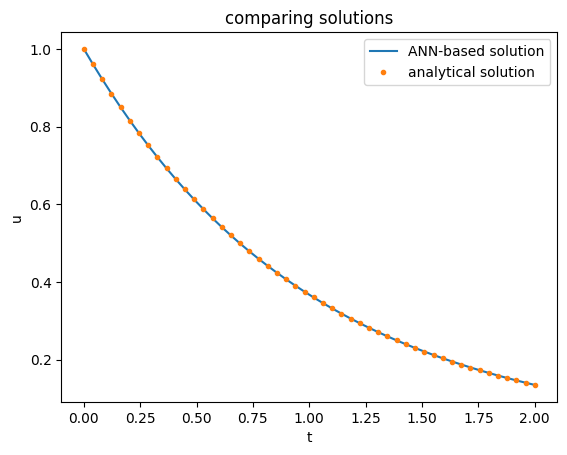

In [5]:
ts = np.linspace(0, 2.0, 50)
sol = solver.get_solution()
u_net = sol(ts, to_numpy=True)
u_ana = np.exp(-ts)

plt.figure()
plt.plot(ts, u_net, label='ANN-based solution')
plt.plot(ts, u_ana, '.', label='analytical solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()
plt.show()